## Graduate Student admissions

***Goals***

1. Estimate chances of graduate admission from an Indian perspective
2. To determine important factors in graduate admissions
3. Predict one's chances of admission given the rest of the variables


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Let's check if there are any null values in the dataset adn drop all the irrelevant columns

In [2]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Lets see the distribution of the variables of graduate applicants

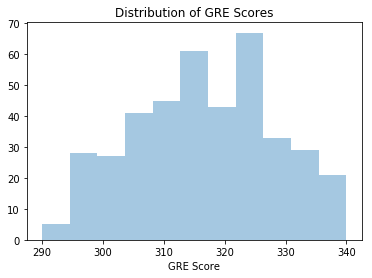

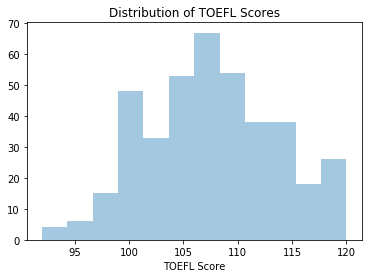

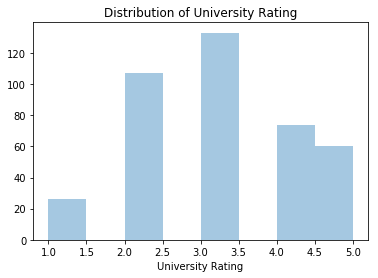

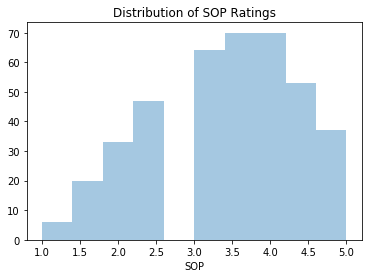

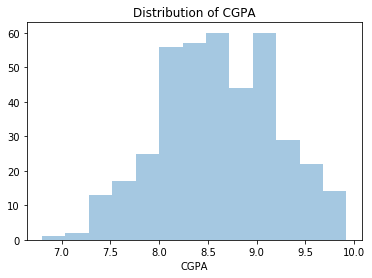

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

It is clear from the distributions, students with varied merit apply for the university.


**Understanding the relation between different factors responsible for graduate admissions**

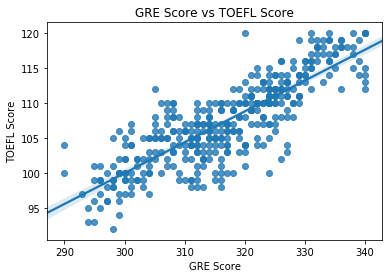

In [4]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

-> From the regression plot above we can see that people with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar but are relatable to some extent

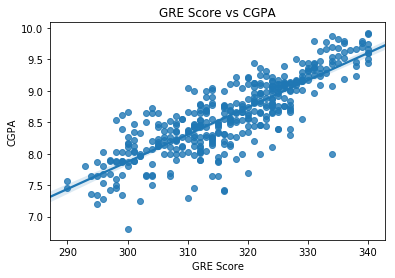

In [5]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

-> Although there are exceptions, but mostly people with higher CGPA have higher GRE scores

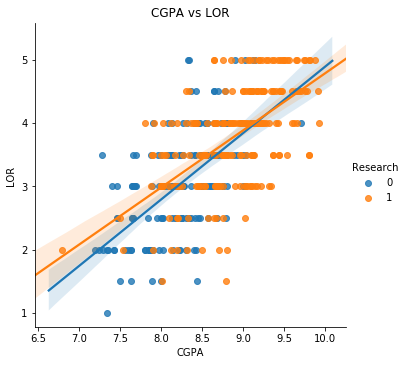

In [6]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("CGPA vs LOR")
plt.show()

-> LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

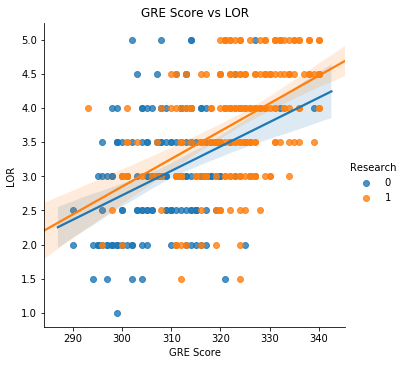

In [7]:
fig = sns.lmplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs LOR")
plt.show()

-> GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores.

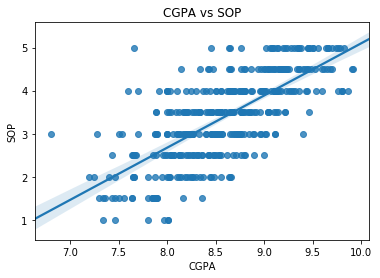

In [8]:
fig = sns.regplot(x="CGPA", y="SOP", data=df)
plt.title("CGPA vs SOP")
plt.show()

-> CGPA and SOP are not that related either

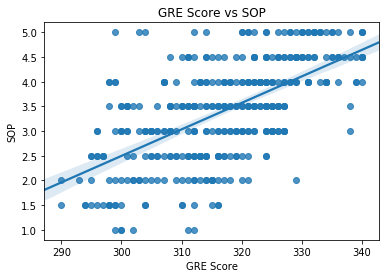

In [9]:
fig = sns.regplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs SOP")
plt.show()

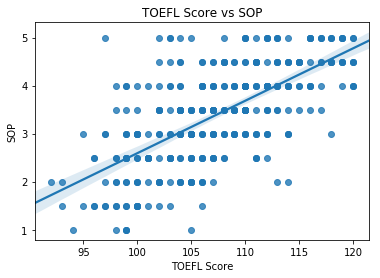

In [10]:
fig = sns.regplot(x="TOEFL Score", y="SOP", data=df)
plt.title("TOEFL Score vs SOP")
plt.show()

-> Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not only always related to the applicants writing skills.

-->
In total we compared 7 different factors:
    1. GRE Score vs TOEFL -   Positive
    2. GRE Score vs CGPA  -   Positive
    3. CGPA vs LOR        -   Not Significant
    4. GRE Score vs LOR   -   Not Significant
    5. CGPA vs SOP        -   Not Significant
    6. GRE Score vs SOP   -   Not Significant
    7. TOEFL Score vs SOP -   Not Significant

**Correlation among variables**

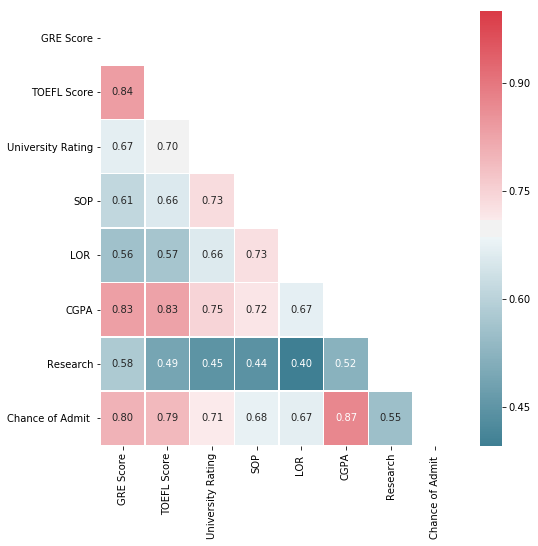

In [11]:
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

Splitting the dataset with training and testing set

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

### Lets use a bunch of different algorithms to see which model performs better

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results: \n")


for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results: 

DecisionTree : 0.09610541087784807
Linear Regression : 0.06473311695782082
RandomForest : 0.0729844161448182
KNeighbours : 0.083342291185208
SVM : 0.10392901682482505
AdaBoostClassifier : 0.0803851079574164
GradientBoostingClassifier:  0.06656338542753197
Lasso:  0.13137657075960432
Ridge:  0.06479970981992439
BayesianRidge:  0.06489601808537483
ElasticNet:  0.0980598738822262
HuberRegressor:  0.0688492948627345


### Inference
As we can see Decesion tree performs the best in this case.

**Generate Feature Importances**

In [14]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

**Visualize Feature Importances**

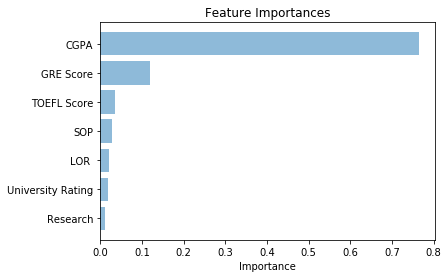

In [15]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

### Clearly, as we can see CGPA is the most factor for graduate admissions followed by GRE Score and then TOEFL later LOR and SOP.

**Acknowledgement**

This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format. The dataset is owned by Mohan S Acharya.